In [1]:
#using rnn(lstm) to predict the stock of apple
#importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#fetting the stock data
df= web.DataReader('AAPL',data_source='yahoo',start='2013-01-01',end='2020-12-30')
#show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.039789
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.824715
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.356062
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.259851
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.303608
...,...,...,...,...,...,...
2020-12-23,132.429993,130.779999,132.160004,130.960007,88223700.0,130.764603
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053


In [3]:
#no of row and column
df.shape

(2014, 6)

In [4]:
#describe mean median sd and many statistical information of data
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03,2014.000000
mean,41.442185,40.589618,41.010237,41.032466,1.919051e+08,39.422952
std,25.268864,24.530347,24.908494,24.917998,1.313985e+08,25.452813
min,14.271429,13.753571,13.856071,13.947500,4.544800e+07,12.191197
25%,25.032499,24.566250,24.716875,24.755624,1.060847e+08,22.808012
50%,32.633751,32.078751,32.303749,32.340000,1.501058e+08,29.685431
75%,48.542500,47.753125,47.969374,48.126250,2.339948e+08,46.839057
max,138.789993,134.339996,138.050003,136.690002,1.460852e+09,136.486053


In [5]:
#gives the inforation of data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2013-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2014 non-null   float64
 1   Low        2014 non-null   float64
 2   Open       2014 non-null   float64
 3   Close      2014 non-null   float64
 4   Volume     2014 non-null   float64
 5   Adj Close  2014 non-null   float64
dtypes: float64(6)
memory usage: 110.1 KB


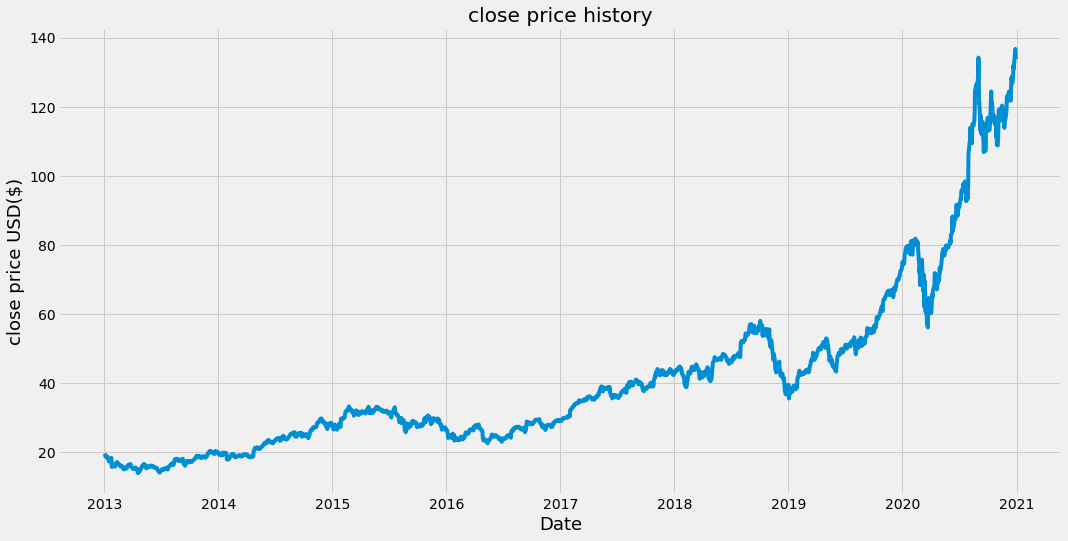

In [6]:
#visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD($)',fontsize=18)
plt.show()

In [7]:
#create a new dataframe with only close column
data=df.filter(['Close'])
#convert the data frame to a array numpy
dataset=data.values
#get or compute the no of rows to train our lstm model
training_data_len=math.ceil(len(dataset)*.8)

training_data_len

1612

In [8]:
#scaling tche data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.04611861],
       [0.04410219],
       [0.03970856],
       ...,
       [1.        ],
       [0.98517215],
       [0.97580299]])

In [9]:
scaled_data.shape

(2014, 1)

In [10]:
#create the trainnig dataset
#create the scaled training data set

train_data=scaled_data[0:training_data_len, :]
#split the data into x_train and y_train datasets

x_train=[]
y_train=[]


for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.04611861, 0.04410219, 0.03970856, 0.03880656, 0.03921682,
       0.03682797, 0.03869309, 0.03775908, 0.0323616 , 0.02775555,
       0.03362439, 0.03263218, 0.0318524 , 0.03324032, 0.03592887,
       0.01744943, 0.01435933, 0.01725447, 0.01971025, 0.01929126,
       0.01890136, 0.01835724, 0.01506929, 0.01958514, 0.01944256,
       0.0226054 , 0.02457235, 0.02601263, 0.02251228, 0.02225332,
       0.02213112, 0.02026019, 0.02021071, 0.01696932, 0.01615751,
       0.01753962, 0.01520896, 0.01700424, 0.01572397, 0.0148016 ,
       0.01162131, 0.00858941, 0.01181625, 0.01022174, 0.01165331,
       0.01198502, 0.01377448, 0.01102773, 0.01100445, 0.01221198,
       0.01545919, 0.01896828, 0.0186104 , 0.01790915, 0.01809828,
       0.02076938, 0.0212553 , 0.02054533, 0.01790915, 0.01516822])]
[0.011167396483809058]



In [11]:
#convert the x_train and y_train in numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [12]:
x_train.shape

(1552, 60)

In [13]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1552, 60, 1)

In [14]:
#built the LSTM modl
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [16]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1552/1552 [==============================] - 61s 34ms/step - loss: 8.5466e-04


In [17]:
#create the testing dataset
#create a new array continuning value form 1552 to 2014

test_data=scaled_data[training_data_len-60:, :]
#create the datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [18]:
#convert the data to a numpy array
x_test=np.array(x_test)


In [19]:
#reshape the data to 3 dimensional as lstm model expect 3 dimension model
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [20]:
#get the model predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [21]:
#evaluate our model
#get the root mean square error(RMSE)

rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

#the lower the rmse the better the predictions

0.9064054062117392

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


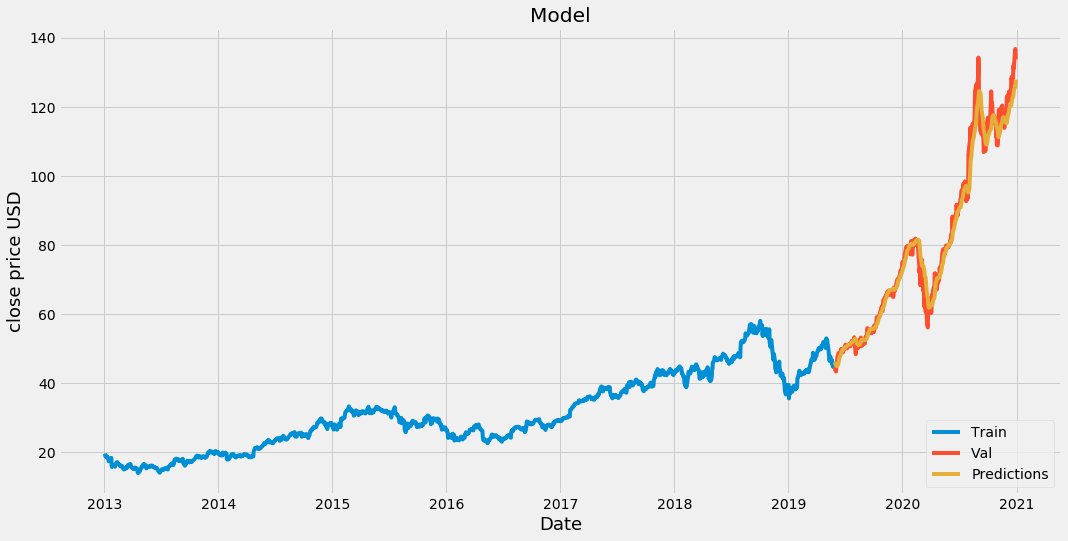

In [22]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [23]:
#show thevalid adn predictedprices

valid

,Close,Predictions
Date,,
2019-05-30,44.575001,45.984627
2019-05-31,43.767502,45.673679
2019-06-03,43.325001,45.356419
2019-06-04,44.910000,45.023560
2019-06-05,45.634998,44.858009
...,...,...
2020-12-23,130.960007,124.181976
2020-12-24,131.970001,124.944466
2020-12-28,136.690002,125.706505


In [24]:
#get the quote
apple_quote= web.DataReader('AAPL',data_source='yahoo',start='2013-01-01',end='2020-12-17')
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 days closing value and convert the dataframe in array
last_60_days=new_df[-60:].values
#scale the value to be between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create and empty list
x_test=[]
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test dataset to a numpy array
x_test=np.array(x_test)
#reshape the array
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(x_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[122.263565]]


In [25]:
#actual stock price in  2020-12-18
apple_quote2= web.DataReader('AAPL',data_source='yahoo',start='2020-12-18',end='2020-12-18')
print(apple_quote2['Close'])


Date
2020-12-18    126.660004
Name: Close, dtype: float64
